# Free Vibrations with Viscous Damping

# Introduction

So far we have learned about free vibrations of conservative single degree of freedom linear systems. In this lesson, we will explore how these systems behave when dissaptive forces are added to the system. Dissipation is present in all real systems. For example, the shock absorbers in a car dissipative energy as heat to control the characteristics of the vibration of the vehicle. Drag due to air resistance is also a dissaptive force.

## Goals

- Write the equations of motion of the system.
- Derive the homogenous solution.
- Investigate the time series solution for different system properties.
- Be able to explain the differences in the three solutions this system.

## Prerequisites

- Free undamped vibrations

# The System

![Alt text](mass_spring_damper.svg)

We are going to extend the homogenous mass spring damper system by adding an applied sinusoidal force. The quantities of interest are:

- $x,\dot{x},\ddot{x}$: position, velocity, and acceleration
- $m$: mass
- $c$: viscous damping coefficient
- $k$: spring constant

# Equations of Motion

We first write down Newton's Second Law for this system by examining the free body diagram:

$$\sum F_x = m \ddot{x} = -c \dot{x} -kx$$

which provides the second order differential equation in canonical form:

$$m\ddot{x} + c\dot{x} + kx = 0$$

# Homogenous Solution

To solve this second order homogenous system we can assume a solution of:

$$x(t) = a e^{\lambda t}$$

If we differentiate twice and plug the resulting three equations into the differential equation we will get:

$$(m \lambda^2 + c \lambda + k) a e^{\lambda t} = 0$$

$a e^{\lambda t}$ is never zero so the unique solution follows when:

$$m \lambda^2 + c \lambda + k = 0$$

This is a quadratic equation in $\lambda$ and using the quadratic equation we can find the roots of this so called *characteristic equation*.

$$\lambda_{1, 2} = -\frac{c}{2m} \pm \frac{1}{2m} \sqrt{c^2 - 4km}$$

$\lambda_{1, 2}$ can be real or complex depending on the discriminant: $c^2 - 4km$.

It is useful to define some new quantities:

- $\omega_n = \sqrt{\frac{k}{m}}$: undamped natural frequency
- $c_c= 2m\omega_n$: critical damping coefficient
- $\zeta = \frac{c}{c_c}$: damping ratio
- $\omega_d = \omega_n \sqrt{1 - \zeta^2}$: damped natural frequency

The equation of motion can also be written in terms of these ratios by dividing through by the mass:

$$\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = 0$$

Now the roots can be written as:

$$\lambda_{1, 2} = -\zeta \omega_n \pm \omega_n\sqrt{\zeta^2 - 1}$$

Depending on the value of $\zeta$ the roots will be a complex conjugate pair, two distinct real roots, or a repeated real root. The solution $x(t)$ depends on these three cases: $\zeta < 1$, $\zeta > 1$, and $\zeta = 1$.

# Underdamped ($\zeta < 1$)

This value of $\zeta$ will produce a complex conjugate pair of roots. We can pull out $i=\sqrt{-1}$ and write the roots as:

$$\lambda_{1, 2} = -\zeta \omega_n \pm i \omega_d$$

Since there are multiple roots the solution to this system and the this is linear, the solution can be written as a linear combination of the solutions:

$$x(t) = e^{-\zeta \omega_n t}(a_1 e^{i\omega_dt} + a_2 e^{-i\omega_dt})$$

Using Euler's formula we can reduce this to:

$$ x(t) = Ae^{-\zeta \omega_n t} sin(\omega_d t + \phi)$$

$A$ and $\phi$ are determined by the initial conditions.

$$A = \sqrt{\frac{(v_0 + \zeta\omega_n x_0)^2 + (x_0\omega_d)^2}{\omega_d^2}}$$

$$\phi=\arctan\left(\frac{x_0\omega_d}{v_0+\zeta\omega_nx_0}\right)$$


# Overdamped ($\zeta > 1$)

This value of $\zeta$ produces two distinct real roots and the solution takes this form:

$$ x(t) = e^{-\zeta\omega_nt}\left(a_1 e^{-\omega_n\sqrt{\zeta^2-1}t} + a_2 e^{\omega_n\sqrt{\zeta^2-1}t}\right) $$

where:

$$ a_1 = \frac{-v_0 + (-\zeta + \sqrt{\zeta^2 - 1})\omega_n x_0}{2 \omega_n \sqrt{\zeta^2-1}} $$

$$ a_2 = \frac{v_0 + (\zeta + \sqrt{\zeta^2 - 1})\omega_n x_0}{2 \omega_n \sqrt{\zeta^2-1}} $$

# Critically Damped ($\zeta = 1$)

Finally, the special case gives two repeated roots and the solution takes the form:

$$ x(t) = (a_1 + a_2t)e^{-\omega_n t}$$

where:

$$
\begin{aligned}
a_1 &= x_0 \\
a_2 &= v_0 + \omega_n x_0
\end{aligned}
$$

# Simulation of the Motion

Let's explore the solution to the system starting with these parameters:

- $m=0.049$ kg
- $k = 857.8$ N/m
- $c=0.11$ kg/s

Depending on the value of $\zeta$ the solution will described by three qualitively different motions: over-damped $(\zeta > 1)$, critically damped $(\zeta = 1)$, or under-damped $(\zeta < 1)$ motion. Use your code to discover what these motions look like and how the parameters of the system affect the behavior.

# Exercise

Create a function that accepts $m$, $c$, and $k$ as parameters and returns $\omega_n$, $\zeta$, and $c_c$.

**Note**: we don't compute $\omega_d$ in case the system is overdamped ($\omega_d$ doesn't exist).

In [1]:
import numpy as np

def vibration_properties(m, c, k):
    # natural frequency [rad/s]
    omega_n = np.sqrt(k / m)
    # critical damping coefficient [kg/s]
    cc = 2 * m * omega_n
    # damping ratio
    zeta = c / cc
    return omega_n, zeta, cc

# Exercise

Create a function that accepts $m$, $c$, $k$, $x_0$, $v_0$ and a simulation duration $d$ and returns an array of 1000 time values and an array of corresponding $x(t)$ values. Make use of the `vibration_properties` function inside this one.

We need to handle underdamped, critically damped, and overdamped cases, so we'll use a series of `if` statements to compute the response in each case.

In [2]:
def simulate(m, c, k, d, x0=0.0, v0=0.0):
    # get our vibration properties
    omega_n, zeta, cc = vibration_properties(m, c, k)
    
    # time values from 0 to d (duration) with 1000 points
    time_array = np.linspace(0, d, num=1000)
    
    # underdamped
    if zeta < 1:
        # damped natural frequency [rad/s]
        omega_d = omega_n * np.sqrt(1 - zeta**2)
        # amplitude
        A = np.sqrt(((v0 + zeta*omega_n*x0)**2 +
                     (x0*omega_d)**2) / omega_d**2)
        # phase
        phi = np.arctan2(x0*omega_d, v0 + zeta*omega_n*x0)
        # total response
        x_array = A * np.exp(-zeta*omega_n*time_array) * \
            np.sin(omega_d*time_array + phi)
    
    # overdamped
    elif zeta > 1:
        # amplitude of first term
        a1 = ((-v0 + (-zeta + np.sqrt(zeta**2-1))*omega_n*x0) /
              (2*omega_n*np.sqrt(zeta**2-1)))
        # amplitude of second term
        a2 = ((v0 + (zeta + np.sqrt(zeta**2-1))*omega_n*x0) /
              (2*omega_n*np.sqrt(zeta**2-1)))
        # exponent
        exp = omega_n * np.sqrt(zeta**2 - 1) * time_array
        # total response
        x_array = np.exp(-zeta*omega_n*t) * \
            (a1*np.exp(-exp) + a2*np.exp(exp))
        
    # critically damped
    else:
        # amplitude of first term
        a1 = x0
        # amplitude of second term
        a2 = v0 + omega_n*x0
        # total response
        x_array = (a1 + a2*time_array)*np.exp(-omega_n*time_array)
        
    return time_array, x_array

# Exercise

Using your functions choose various values of $c$ such that you get three different values for $\zeta$ where $(\zeta > 1)$, $(\zeta = 1)$, and $(\zeta < 1)$ and plot the resulting motions for these values. In a text box describe what you observe.

First, we can use our `vibration_properties` function to see what changing $c$ does to $\zeta$

In [3]:
m = 0.049 # mass [kg]
k = 857.8 # spring stiffness [N/m]

for c in np.linspace(0, 20, 10):
    omega_n, zeta, cc = vibration_properties(m, c, k)
    print("c = {:5.2f}, zeta = {:.2f}".format(c, zeta))

c =  0.00, zeta = 0.00
c =  2.22, zeta = 0.17
c =  4.44, zeta = 0.34
c =  6.67, zeta = 0.51
c =  8.89, zeta = 0.69
c = 11.11, zeta = 0.86
c = 13.33, zeta = 1.03
c = 15.56, zeta = 1.20
c = 17.78, zeta = 1.37
c = 20.00, zeta = 1.54


We can see from the "table" printout that as $c$ approaches the critical value $c_c$, $\zeta$ approaches 1.

Now we'll just select some values for $c$ which result in appropriate values of $\zeta$ for each case.

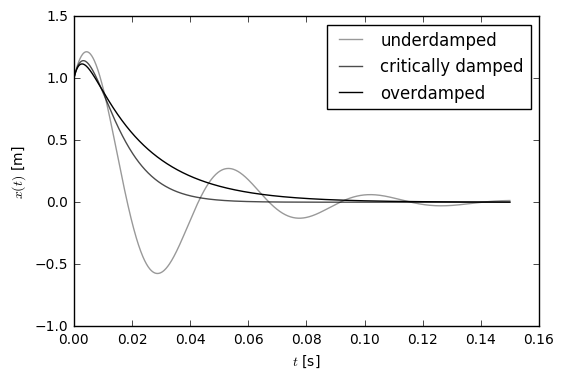

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# some values of c and plot properties
# note: we can use cc from the above loop
c_values = [3, cc, 20]
labels = ['underdamped', 'critically damped', 'overdamped']
alphas = [0.4, 0.7, 1]

x0 = 1   # initial position [m]
v0 = 100 # initial velocity [m/s]

for c, label, alpha in zip(c_values, labels, alphas):
    t, x = simulate(m, c, k, 0.15, x0=x0, v0=v0)
    plt.plot(t, x, alpha=alpha, label=label, color='k')
    
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$x(t)$ [m]')
plt.legend()

# Exercise

A spring-mass-damper system has a mass of 150 kg, stiffness of 1500 N/m, and damping coefficient of 200 kg/s. Calculate the undamped natural frequency, the damping ratio, and the damped natural frequency. Is the system overdamped, underdamped, or critically damped? Does the solution oscillate? Show the motion in a plot.

undamped natural frequency: 3.16 rad/s
damping ratio: 0.21
damped natural frequency: 3.09 rad/s


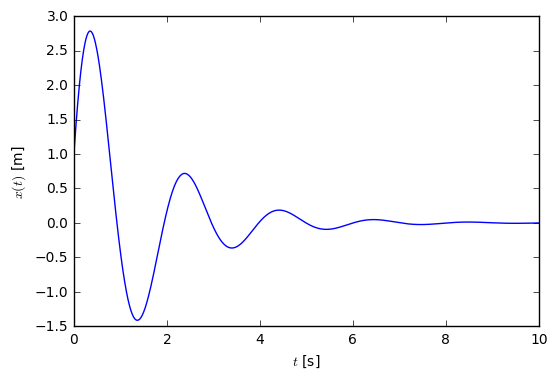

In [5]:
# system parameters
m = 150  # mass [kg]
k = 1500 # stiffness [N/m]
c = 200  # damping coefficient [kg/s]

# make up some initial conditions
x0 = 1  # initial position [m]
v0 = 10 # initial velocity [m/s]

# compute the vibration properties
omega_n, zeta, cc = vibration_properties(m, c, k)
omega_d = omega_n * np.sqrt(1 - zeta**2)

print("undamped natural frequency: {:.2f} rad/s".format(omega_n))
print("damping ratio: {:.2f}".format(zeta))
print("damped natural frequency: {:.2f} rad/s".format(omega_d))

# simulate and plot
t, x = simulate(m, c, k, 10, x0=x0, v0=v0)
plt.plot(t, x)
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$x(t)$ [m]')

Since the damping ratio is less than one, the system is **underdamped** and it oscillates.